In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate

In [73]:
ratings_df = pd.read_csv("C:/Users/rakes/jupyter/recommendationsystem/archive/ratings_small.csv")

In [74]:
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [75]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


#  Recommendation System with PMF

In [86]:
reader = Reader(line_format = 'user item rating',rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_df[["userId", "movieId","rating"]],reader)
svd = SVD(biased = False)
model = cross_validate(svd, data, measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0181  1.0125  1.0106  1.0113  1.0152  1.0136  0.0028  
MAE (testset)     0.7853  0.7791  0.7766  0.7783  0.7835  0.7806  0.0033  
Fit time          3.30    3.30    3.30    3.33    3.30    3.31    0.01    
Test time         0.08    0.41    0.42    0.08    0.41    0.28    0.16    


# Recommendation System with Item & User Based CF 

In [88]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
sim_options = {
    "user_based": [False, True],
}
param_grid = {"sim_options": sim_options}
rs1 = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
rs1.fit(data)
# print(rs1)
results_df1 = pd.DataFrame.from_dict(rs1.cv_results)
results_df1

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.909271,0.917649,0.919371,0.914056,0.914663,0.915002,0.003463,1,0.695730,0.702796,...,0.699334,0.699885,0.002352,1,3.036573,0.170656,5.200112,0.481110,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.914508,0.922117,0.922806,0.921848,0.917514,0.919759,0.003219,2,0.698782,0.705982,...,0.701803,0.702971,0.002728,2,0.162693,0.003943,1.299357,0.149163,{'sim_options': {'user_based': True}},{'user_based': True}


In [89]:
results_df1[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.915002,0.699885,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.919759,0.702971,{'sim_options': {'user_based': True}},{'user_based': True}


In [126]:

sim_options = {
    "name": ["cosine","msd","pearson"],
    "user_based": [False, True],
}
param_grid = {"sim_options": sim_options}
rs = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
rs.fit(data)
print(rs)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [127]:
results_df = pd.DataFrame.from_dict(rs.cv_results)
results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.924279,0.928445,0.931038,0.925932,0.926620,0.927263,0.002312,5,0.708437,0.710880,...,0.709181,0.709663,0.002146,6,12.304534,1.756936,9.134228,5.304636,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': False}"
1,0.919032,0.923106,0.929329,0.922268,0.924008,0.923549,0.003343,3,0.704746,0.706950,...,0.707085,0.706961,0.002148,4,0.518500,0.012039,1.889583,1.040544,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': True}"
2,0.915115,0.917467,0.918954,0.913780,0.914703,0.916004,0.001912,1,0.700330,0.702531,...,0.700431,0.700827,0.001949,1,3.055247,0.029527,5.196594,0.210718,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': False}"
3,0.915747,0.919694,0.924824,0.918133,0.920652,0.919810,0.003006,2,0.701034,0.703385,...,0.703669,0.703038,0.001910,2,0.171375,0.003575,1.464228,0.211016,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': True}"
4,0.927921,0.927802,0.931442,0.925077,0.928505,0.928149,0.002029,6,0.707873,0.707591,...,0.707263,0.707144,0.002397,5,16.865106,1.001364,8.522538,3.701013,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': False}"
5,0.921679,0.923693,0.927310,0.922407,0.926154,0.924249,0.002159,4,0.703450,0.703615,...,0.704922,0.703827,0.001486,3,0.711927,0.038404,1.399495,0.222105,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': True}"


In [128]:
results_df[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.927263,0.709663,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': False}"
1,0.923549,0.706961,"{'sim_options': {'name': 'cosine', 'user_based...","{'name': 'cosine', 'user_based': True}"
2,0.916004,0.700827,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': False}"
3,0.919810,0.703038,"{'sim_options': {'name': 'msd', 'user_based': ...","{'name': 'msd', 'user_based': True}"
4,0.928149,0.707144,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': False}"
5,0.924249,0.703827,"{'sim_options': {'name': 'pearson', 'user_base...","{'name': 'pearson', 'user_based': True}"


In [129]:
similarity = ["cosine","msd","pearson"]
rs = ["USERCF","ITEMCF"]
similarity_df = pd.DataFrame(columns = similarity, index = rs)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEMCF"
    else:
        modeltype = "USERCF"
    similarity_df.loc[modeltype][sim] = results_df["mean_test_rmse"][i]
similarity_df    

,cosine,msd,pearson
USERCF,0.923549,0.91981,0.924249
ITEMCF,0.927263,0.916004,0.928149


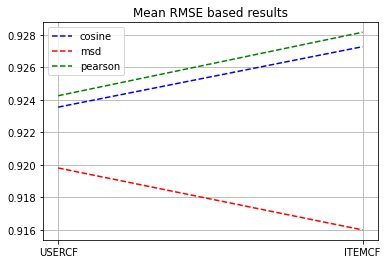

In [135]:
plt.figure()
plt.plot([0,1],similarity_df['cosine'],'--b',label = 'cosine')
plt.plot([0,1],similarity_df['msd'],'--r',label = 'msd')
plt.plot([0,1],similarity_df['pearson'],'--g',label = 'pearson')
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results")
plt.legend()
plt.grid()
plt.show()

          cosine       msd   pearson
USERCF  0.706961  0.703038  0.703827
ITEMCF  0.709663  0.700827  0.707144


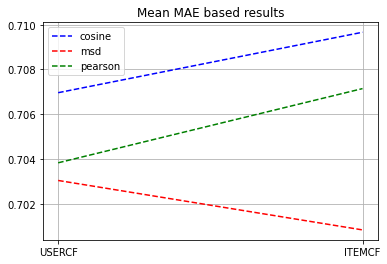

In [137]:
similarity = ["cosine","msd","pearson"]
rs = ["USERCF","ITEMCF"]
similarity_df_mae = pd.DataFrame(columns = similarity, index = rs)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEMCF"
    else:
        modeltype = "USERCF"
    similarity_df_mae.loc[modeltype][sim] = results_df["mean_test_mae"][i]
print(similarity_df_mae) 
plt.figure()
plt.plot([0,1],similarity_df_mae['cosine'],'--b',label = 'cosine')
plt.plot([0,1],similarity_df_mae['msd'],'--r',label = 'msd')
plt.plot([0,1],similarity_df_mae['pearson'],'--g',label = 'pearson')
plt.xticks([0,1],rs)
plt.title("Mean MAE based results")
plt.legend()
plt.grid()
plt.show()

In [159]:
from surprise import KNNBasic
sim_options1 = {
    "name": "msd",
    "user_based": True,
}
sim_options2 = {
    "name": "msd",
    "user_based": False,
}
K_df = pd.DataFrame(index = rs)
K_column = []
for i in range(7):
    K = 70*(i+1+i);
    K_column.append(K)
K_df = pd.DataFrame(columns = K_column, index = rs)
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options1), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["USERCF"][K] = Krs['test_rmse'].mean()
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options2), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["ITEMCF"][K] = Krs['test_rmse'].mean()
K_df

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,70,210,350,490,630,770,910
USERCF,0.97322,0.978301,0.979233,0.977535,0.978618,0.978428,0.979865
ITEMCF,0.931823,0.937117,0.940368,0.942995,0.944165,0.945071,0.945449


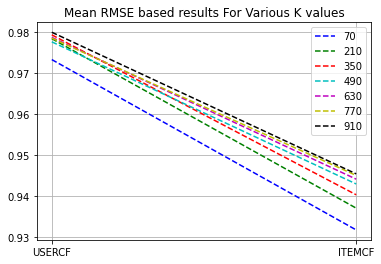

In [160]:
plt.figure()
count =0
for K in K_column:
    colour = ['b','g','r','c','m','y','k']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K_df[K],prop, label = K)
    
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results For Various K values")
plt.legend()
plt.grid()
plt.show()

In [168]:
from surprise import KNNBasic
sim_options1 = {
    "name": "msd",
    "user_based": True,
}
sim_options2 = {
    "name": "msd",
    "user_based": False,
}
K2_column = []
for i in range(7):
    K = 7*(i+1+i);
    K2_column.append(K)
K2_df = pd.DataFrame(columns = K2_column, index = rs)
for K in K2_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options1), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["USERCF"][K] = Krs['test_rmse'].mean()
for K in K2_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options2), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["ITEMCF"][K] = Krs['test_rmse'].mean()
K2_df

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,7,21,35,49,63,77,91
USERCF,0.97441,0.963107,0.966931,0.971644,0.972464,0.973995,0.975761
ITEMCF,0.997589,0.947228,0.936013,0.933159,0.931428,0.931713,0.93237


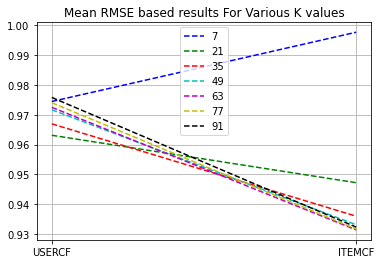

In [170]:
plt.figure()
count =0
for K in K_column:
    colour = ['b','g','r','c','m','y','k']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K2_df[K],prop, label = K)
    
plt.xticks([0,1],rs)
plt.title("Mean RMSE based results For Various K values")
plt.legend()
plt.grid()
plt.show()